In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
from operator import itemgetter

In [3]:
input_path = "dominantna_komponenta.gml"
Gdom = nx.read_gml(input_path)
input_path2 = "undirected_count_aggregation.gml"
G = nx.read_gml(input_path2)

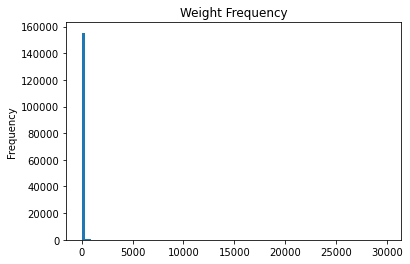

In [5]:
tezine_grana = nx.get_edge_attributes(G,'weight') #vraca tip dict!!!
tezine_values=tezine_grana.values()
plt.hist(tezine_values, bins=100)
plt.gca().set(title='Weight Frequency', ylabel='Frequency');
plt.show()

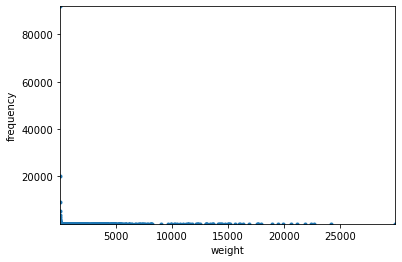

In [6]:
deg_counts = Counter(tezine_values)     
x, y = zip(*deg_counts.items())                                                      
#plt.figure(1)   

plt.xlabel('weight')  
                                                                                                            
plt.xlim(1, max(x))  

plt.ylabel('frequency')                                                                                                          
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

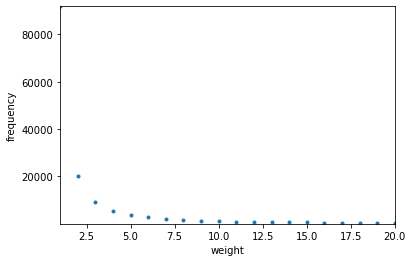

In [7]:
deg_counts = Counter(tezine_values)     
x, y = zip(*deg_counts.items())                                                      
#plt.figure(1)   

plt.xlabel('weight')  
                                                                                                            
plt.xlim(1, 20)  #vidimo kad skratimo opseg da najveci broj cvorova ima tezinu manju od 5, a to je jako mala tezina

plt.ylabel('frequency')                                                                                                          
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

In [9]:
G.remove_edges_from((e for e, w in tezine_grana.items() if w < 5))

print(nx.info(G))

output_pathF = "SNetF.gml"

nx.write_gml(G, output_pathF)

Graph with 4359 nodes and 30227 edges


In [16]:
#7) Kolika je gustina mreže?

print(nx.density(G))

0.0031823720152562665


Kolike su prosečne distance u okviru mreže i dijametar mreže?
Diameter: 4
Average Path length: 1.967436719581427

U kojoj meri je mreža povezana i centralizovana? Navesti broj i veličine povezanih komponenata i proceniti da li postoji gigantska komponenta.

In [13]:
component_size_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)] #connected_components(G) izvuce generatore za povezane komponente, sortira se po duzini generatora
print(component_size_list) #imamo jednu dominantnu komp, ostale su male
print('Broj povezanih komponenti: '+str(len(component_size_list)))
print('Postoji jedna gigantska komponenta veličine 765, 1 veličine 2 i ostale su veličine 1.')

[765, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [14]:
# ekstrakcija dominantne komponente
largest_cc = max(nx.connected_components(G), key=len)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
Gdom = G.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")

Dominantna komponenta ima 765 čvorova i 30226 grana


In [15]:
dominant_component_path = "SNETFdominantna_komponenta.net"
nx.write_pajek(Gdom, dominant_component_path)
output_path = "SNETFdominantna_komponenta.gml"
nx.write_gml(Gdom, output_path)

In [2]:
input_path = "SNETFdominantna_komponenta.gml"
Gdom = nx.read_gml(input_path)

In [6]:
G=Gdom #radicemo s njom samo

Koliki je prosečni, a koliki globalni koeficijent klasterizacije mreže? Kakva je raspodela lokalnog koeficijenta klasterizacije njenih čvorova? Da li je klasterisanje izraženo ili ne? Odgovor dati upoređivanjem sa slučajno generisanom Erdos-Renyi mrežom istih dimenzija.

In [7]:
#Prosecni koeficijent klasterizaije za nasu mrezu iz nx (bez weight smo)
nx.average_clustering(G)

0.8531120605131759

In [8]:
#Globalni koeficijent klasterizacije (3*numOfTriangles/numOfTriads, svi trouglovi/sve triade)
glob_koef=nx.transitivity(G)
print(glob_koef)

0.4449591751232102


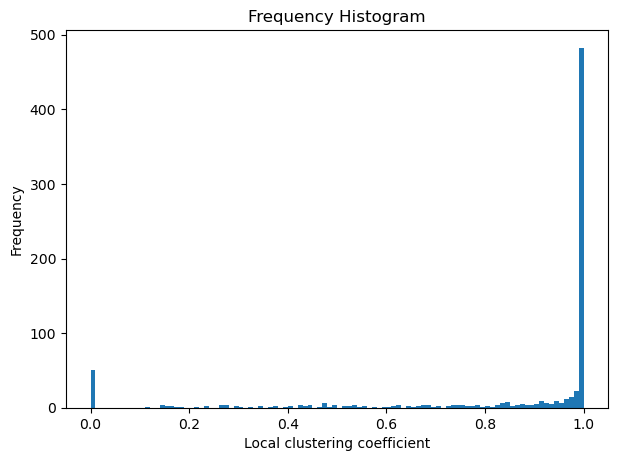

In [9]:
dict=nx.clustering(G).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Local clustering coefficient');

In [11]:
#Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m? //da bi bio isti br grana kao u nasoj mrezi //ovde postoji verovatnoca postojanja grane
m=G.number_of_edges()
n=G.number_of_nodes()
p = ( 2*float(m) ) / ( n* (n-1) ) 
er_mreza = nx.erdos_renyi_graph(n,p)
#Prosecni koeficijent klasterizaije za ER iz nx
nx.average_clustering(er_mreza)

0.10401118821971675

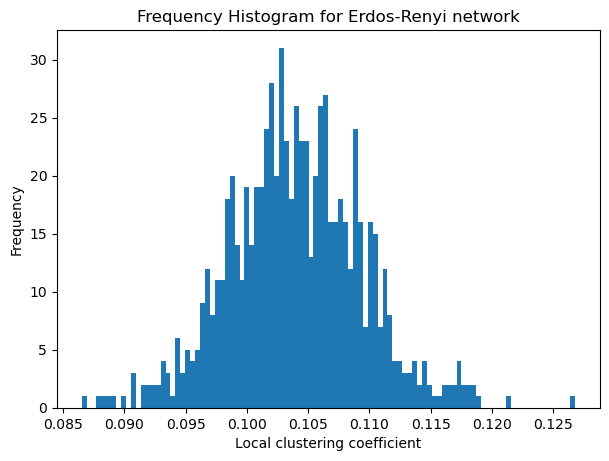

In [12]:
#Lokalni koeficijent klasterizaije za ER
dict_er=nx.clustering(er_mreza).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict_er
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram for Erdos-Renyi network', xlabel='Local clustering coefficient',ylabel='Frequency');

Klasterizacija je malo izražena kod SNetF mreže sa prosečnim stepenom klasterizacije 0.149, dok je kod Ernos-Renyi mreže veoma malo izražena, sa prosečnim stepenom klasterizacije oko 0.003.

Na osnovu odgovora na pitanja 8 i 10, proceniti da li mreža iskazuje osobine malog sveta. 
S obzirom na veoma male vrednosti prosečne distance (2) i dijametra(4), može se zaključiti da se do bilo kog čvora može doći u veoma malom broju koraka, što nas dovodi do zaključka da naša mreža pokazuje osobine malog sveta. Uzimajući u obzir stepen klasterizacije.. ?.

In [13]:
#Izvršiti asortativnu analizu po stepenu čvora i dati odgovor da li je izraženo asortativno mešanje. 
#U slučaju da je mreža usmerena, analizu izvršiti i po ulaznom i po izlaznom stepenu čvora. Priložiti i vizuelizaciju. 

#Analiza asortativnosti - meri koliko se cvorovi vezuju sa sebi slicnim cvorovima
#U ovoj analizi ćemo prvo sprovesti analizu asortativnosti na osnovu stepena čvora, jer nas interesuje da li se međusobno vezuju čvorovi koji su sličnog stepena, ili habovi (čvorovi velikog stepena) teže da se slabo međusobno vezuju, a mnogo vezuju sa čvorovima malog stepena.
#Uvodi se koeficijent asortativnosti r, koji je u opsegu od -1 do 1. Mreža sa r = 1 iskazuje savršeno asortativno mešanje (perfect assortative mixing pattern), kad je r = 0 mreža je neasortativna ili neutralna, dok je u slučaju r = −1 mreža potpuno disasortativna.
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

#U slučaju netežinskog grafa mreža je disasortativna, odnosno, čvorovi sličnog stepena se retko vezuju međusobno.
#U slučaju težinskog grafa mreža je neasortativna(neutralna).

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: -0.5946028885606947
Koeficijent asortativnosti na osnovu težinskog stepena čvora: -0.004688386111237077


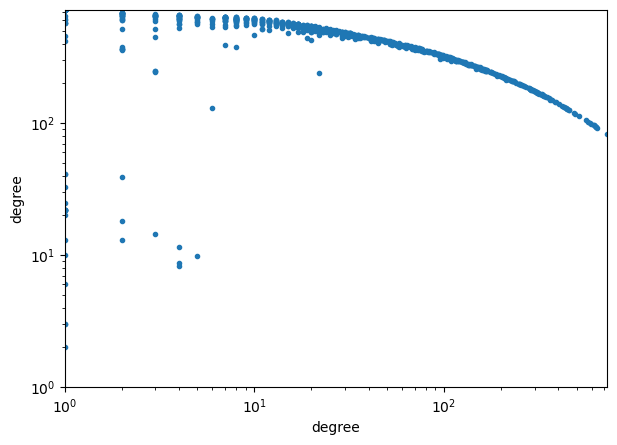

In [14]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  

y=[]
for n in G.nodes():
    list_n=[n]
    
    degree=nx.average_neighbor_degree(G,nodes=list_n)
    #print(degree)
    #print('ok')
    y.append(list(degree.values())[0])

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(deg_list, y, marker='.')                                                                                                    
plt.show()

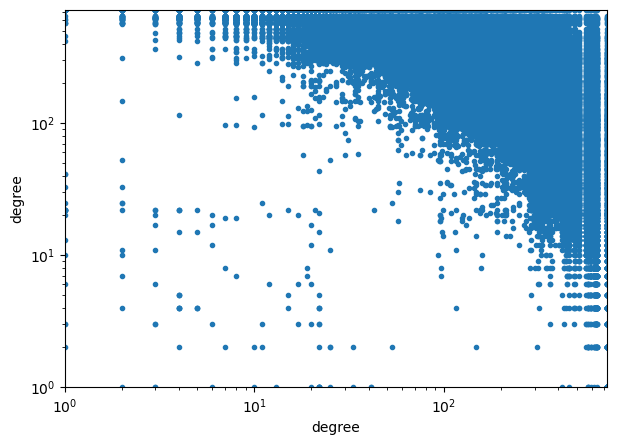

In [15]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  
x=[]
y=[]
for n in G.nodes():
    degreeN=G.degree(n)
    for nn in G.neighbors(n):
        degreeNN=G.degree(nn)
        x.append(degreeN)
        y.append(degreeNN)

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

In [16]:
#Raspodela stepena cvora
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"): #fja

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 48, 2: 27, 8: 23, 4: 23, 7: 20, 3: 17, 10: 16, 12: 15, 20: 14, 17: 14, 14: 14, 15: 13, 5: 13, 9: 13, 21: 12, 11: 12, 13: 12, 32: 11, 22: 11, 16: 10, 18: 8, 19: 8, 6: 8, 24: 7, 29: 7, 45: 7, 35: 7, 25: 6, 34: 6, 89: 5, 52: 5, 77: 5, 27: 5, 41: 5, 57: 5, 30: 5, 94: 4, 115: 4, 47: 4, 139: 4, 23: 4, 26: 4, 167: 4, 31: 4, 74: 4, 99: 4, 53: 4, 76: 3, 58: 3, 154: 3, 51: 3, 75: 3, 40: 3, 48: 3, 49: 3, 209: 3, 100: 3, 46: 3, 38: 3, 105: 3, 107: 3, 104: 3, 33: 3, 62: 3, 106: 3, 36: 3, 70: 3, 126: 3, 67: 3, 93: 3, 37: 3, 249: 3, 338: 2, 312: 2, 289: 2, 177: 2, 232: 2, 191: 2, 44: 2, 307: 2, 114: 2, 157: 2, 63: 2, 124: 2, 427: 2, 112: 2, 42: 2, 210: 2, 43: 2, 145: 2, 362: 2, 118: 2, 80: 2, 54: 2, 83: 2, 108: 2, 81: 2, 39: 2, 129: 2, 59: 2, 28: 2, 113: 2, 68: 2, 213: 2, 92: 2, 103: 2, 95: 2, 61: 2, 98: 2, 148: 2, 135: 2, 144: 2, 110: 2, 50: 2, 72: 2, 586: 1, 165: 1, 572: 1, 119: 1, 202: 1, 117: 1, 130: 1, 283: 1, 300: 1, 356: 1, 120: 1, 127: 1, 96: 1, 64: 1, 78: 1, 160: 1, 313: 1, 168: 

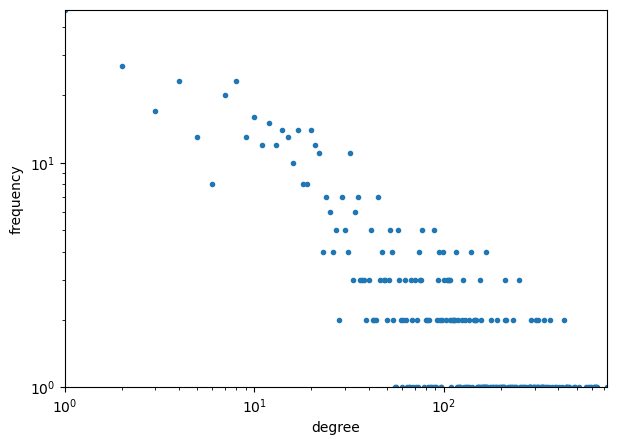

In [17]:
plot_deg_frequency(G) #Isplotujmo raspodelu netežinskog stepena čvora kao scatterplot.

Counter({5: 25, 10: 15, 20: 11, 6: 10, 35: 10, 57: 8, 43: 7, 45: 6, 7: 6, 15: 6, 21: 6, 40: 5, 42: 5, 62: 5, 12: 5, 29: 4, 53: 4, 23: 4, 11: 4, 80: 4, 25: 4, 143: 4, 126: 3, 106: 3, 171: 3, 49: 3, 18: 3, 153: 3, 39: 3, 149: 3, 179: 3, 81: 3, 380: 3, 52: 3, 14: 3, 209: 3, 315: 3, 159: 3, 27: 3, 287: 3, 46: 3, 79: 3, 37: 3, 47: 3, 90: 3, 4639: 2, 1444: 2, 128: 2, 36: 2, 85: 2, 3385: 2, 8: 2, 416: 2, 160: 2, 274: 2, 204: 2, 311: 2, 529: 2, 64: 2, 60: 2, 69: 2, 453: 2, 104: 2, 168: 2, 407: 2, 87: 2, 111: 2, 105: 2, 351: 2, 50: 2, 127: 2, 95: 2, 26: 2, 277: 2, 120: 2, 74: 2, 133: 2, 140: 2, 1464: 2, 9: 2, 894: 2, 91: 2, 196: 2, 2194: 2, 101: 2, 16: 2, 92: 2, 55: 2, 138: 2, 1618: 2, 388: 2, 77: 2, 78: 2, 976: 2, 116: 2, 107: 2, 132: 2, 97: 2, 63: 2, 100: 2, 73: 2, 86: 2, 256877: 1, 284: 1, 2188: 1, 1762: 1, 744: 1, 17: 1, 2054: 1, 50616: 1, 228469: 1, 33495: 1, 188: 1, 154: 1, 22164: 1, 528: 1, 481: 1, 2041: 1, 9092: 1, 2608: 1, 290: 1, 4514: 1, 144: 1, 7320: 1, 109: 1, 1688: 1, 11362: 1, 49

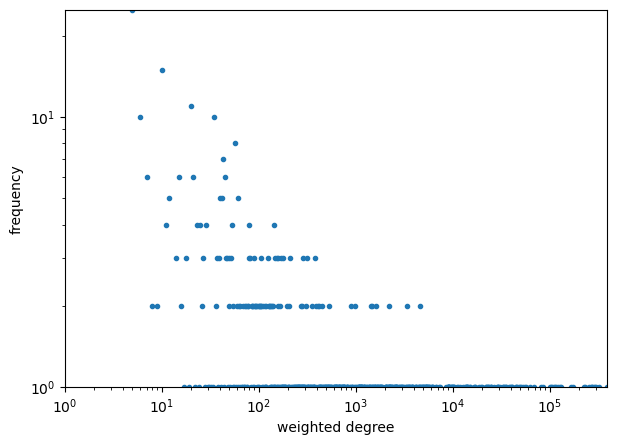

In [18]:
plot_deg_frequency(G, weighted = True) #Pošto je mreža težinska, treba ispitati i raspodelu težinskog stepena čvora.

In [20]:
#Analiza i fitovanje power law mrežnog modela

#na log-log grafiku kumulativne raspodele stepena čvora bi opet trebalo da dobijemo pravu, samo sa manjim nagibom i manjim šumom u repu!
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) #prodjemo kroz cvorove i njihove stepenove
#degreeCount = Counter(degree_sequence)
#deg, cnt = zip(*degreeCount.items())

#max_deg = max(deg) # hoćemo po jedan bin za svaki stepen čvora #max stepen cvorova

# izračunavanje histograma
#values, base = np.histogram(deg, bins = max_deg) #za svaki stepen po jedan bin da iscrta

# kumulativna suma (inkluzivna prefiksna suma)
#cumulative = np.cumsum(values)

# plotovanje komplementarne kumulativne raspodele stepena čvora P(X>x)
#plt.plot(base[:-1], [float(x)/len(dfComAndSub) for x in len(dfComAndSub) - cumulative], c='blue')

#plt.show()

In [21]:
!pip install powerlaw
import powerlaw

You should consider upgrading via the 'C:\Users\Marina\anaconda3\python.exe -m pip install --upgrade pip' command.


In [22]:
results = powerlaw.Fit(degree_sequence)
print(results.power_law.alpha)#ono alfa u formuli
print(results.power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
print(results.power_law.sigma) #koliko odstupaju podaci, treba sto manje, da bude sto bolje fitovano

R, p = results.distribution_compare('power_law', 'exponential') #da li neka druga distribucija fituje bolje, treba da uporedimo nekoliko i ako powerlaw fituje najbolje, mozemo smatrati da je to powerlaw raspodela
print(f"Loglikelihood ratio: {R}") #ako je pozitivno verovatnije je da su podaci po prvoj (powerlaw) raspodeli, ako je neg. po drugoj, sto je vece, veca je verovatnoca
print(f"Statistical significance: {p}") #pretpostavimo da nije powerlaw nego random, p predstavlja koja je verovatnoca da random izvlacenjem podataka dobijemo da izleda isto tako slika, ako je velika verovatnoca, to je velika sansa da zaista nema powerlaw efekta 
# ako je mala sansa da random podacima dobijemo ovako, to znaci da vrv ima powerlaw
#u slucaju kada ovako ima dva parametra malo p znaci da je mala verovtanoca da je promasio da je prvi arg. bolji od drugog, sto je manja verovatnoca to smo sigurniji da je prvi model bolji od drugog

R, p = results.distribution_compare('power_law', 'truncated_power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal_positive') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'stretched_exponential') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

results = powerlaw.Fit(degree_sequence)
print(results.truncated_power_law.alpha)#ono alfa u formuli
print(results.truncated_power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
#print(results.truncated_power_law.sigma)  #ne postoji za truncated

Calculating best minimal value for power law fit
3.8693479650545686
272.0
0.36738236088739123
Loglikelihood ratio: -2.496370107128058
Statistical significance: 0.07011455078542028


Assuming nested distributions


Loglikelihood ratio: -2.2937565021332986
Statistical significance: 0.03220571262936678
Loglikelihood ratio: 2.2937565021332986
Statistical significance: 0.03220571262936678
Loglikelihood ratio: 0.11945372408456123
Statistical significance: 0.8014912660959591
Loglikelihood ratio: -0.30049758097268064
Statistical significance: 0.6517487420139914
Loglikelihood ratio: 0.11945372408456123
Statistical significance: 0.8014912660959591
Calculating best minimal value for power law fit
1.0000745930207715
272.0


Assuming nested distributions


Poređenjem sa drugim distribucijama (power law, exponential, lognormal,...) dobijamo da mreža prati najbolje truncated power law raspodelu.

Odrediti najvažnije habove i autoritete u mreži. Kako su oni raspoređeni i ugrađeni u mrežu, da li su na periferiji ili u jezgru mreže?

S obzirom da je graf neusmeren, habovi i autoriteti predstavljaju istu stvar i gleda se samo stepen čvora. Najbitniji su sledeći: ...

In [23]:
degrees = [(node,val) for (node, val) in G.degree()]
largest_degrees=sorted(degrees, key=lambda x: x[1], reverse=True)[0:10]
print(largest_degrees)

[('reddit.com', 724), ('politics', 643), ('pics', 632), ('science', 630), ('technology', 627), ('worldnews', 618), ('funny', 617), ('WTF', 599), ('entertainment', 586), ('programming', 572)]


In [37]:
for i in range(0,10):
    ex=nx.eccentricity(Gdom,v=largest_degrees[i])
    print(ex)

{'reddit.com': 2}
{'politics': 3}
{'pics': 3}
{'science': 3}
{'technology': 3}
{'worldnews': 3}
{'funny': 3}
{'WTF': 3}
{'entertainment': 3}
{'programming': 3}


Ekscentričnost najvažnijih habova iznosi 3, dok dijametar mreže iznosi 4, što ukazuje da se oni nalaze negde između periferije i jezgra mreže.

In [39]:
#metrike su pravljene za mreže koje su jedna povezana komponenta).
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G) #centr. po stepenu
    CC_dict = nx.closeness_centrality(G) #centr. po blizini
    BC_dict = nx.betweenness_centrality(G) #relaciona centr.
    EVC_dict = nx.eigenvector_centrality(G, weight='weight') #po svojstvenom vektoru

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df

dataCentralitiesSNet=[]
dataCentralitiesSNet = calculate_centralities(Gdom)
print(dataCentralitiesSNet)

                        DC        CC            BC       EVC
entertainment     0.767016  0.807611  3.620930e-02  0.247075
deutschland       0.032723  0.500000  1.051564e-03  0.000259
AmericanPolitics  0.215969  0.550432  1.099088e-04  0.002491
ArtCrit           0.123037  0.523646  6.666328e-07  0.001508
SewerHorse        0.099476  0.517265  0.000000e+00  0.001430
...                    ...       ...           ...       ...
Fitness           0.128272  0.525086  4.070790e-07  0.001015
es                0.026178  0.499020  3.914327e-03  0.000394
BSD               0.090314  0.514825  8.650620e-08  0.000597
gay               0.006545  0.490058  0.000000e+00  0.000032
WebGames          0.184555  0.541076  2.443992e-05  0.003394

[765 rows x 4 columns]


In [40]:
#Centralnost po stepenu - stepen čvora normalizovan maksimalnim mogućim stepenom čvora tj n-1. 
#U slučaju usmerenog grafa, ulazni i izlazni stepen čvora odgovaraju ulaznoj i izlaznoj centralnosti po stepenu. 
df_dc = pd.DataFrame({'DC':dataCentralitiesSNet['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10)) #najvecih 10 uzimamo da analiziramo

                     DC
reddit.com     0.947644
politics       0.841623
pics           0.827225
science        0.824607
technology     0.820681
worldnews      0.808901
funny          0.807592
WTF            0.784031
entertainment  0.767016
programming    0.748691


In [41]:
#Centralnost po bliskosti - koliko je čvor *udaljen* od drugih u mreži. Čvorovi koji su centralniji su bolji izvori širenja informacija.  
#recipročna vrednost sume najkraćih rastojanja od posmatranog čvora do ostalih sa kojima je povezan, normalizovana sa N-1
df_cc = pd.DataFrame({'CC':dataCentralitiesSNet['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10)) #dovoljno je da budu povezani sa jednim cvorom koji je blizak sa dosta njih i imace dobru centr., br hopova +1

                     CC
reddit.com     0.950249
politics       0.849833
pics           0.847947
technology     0.844199
science        0.838639
worldnews      0.835886
funny          0.834061
WTF            0.808466
entertainment  0.807611
programming    0.795833


In [42]:
#Relaciona centralnost (betweenness centrality) govori na koliko se najkraćih putanja između drugih čvorova neki čvor nalazi
# u odnosu na ukupan broj takvih najkraćih puteva
#U slučaju socijalne mreže, akter sa visokom relacionom centralnošću kontrološe tok informacija i predstavlja kandidata za brokerski čvor
df_bc = pd.DataFrame({'BC':dataCentralitiesSNet['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10)) #povezani su sa subredditima iz raznih drugih oblasti, i onda ako drugi nisu povezani sa ostalima svi najkraci putevi idu preko njih

                     BC
reddit.com     0.191220
politics       0.060963
pics           0.054266
technology     0.051593
science        0.051344
programming    0.049073
worldnews      0.048672
funny          0.047436
WTF            0.041516
entertainment  0.036209


In [43]:
#Centralnost po sopstvenom vektoru - koliko je uticajan čvor u mreži. 
#Ideja je da su čvorovi povezani sa manje uticajnim susedima više uticajni (//bitniji su od njih, ovo je alternativna verzija(bonacich//) 
#i da je uticajnost čvora proporcionalna zbiru uticajnosti njegovih suseda (//vise uticajan, mocan ako su oni vise uticajni, kontradiktorno malo u odnosu na onaj prvi deo..//)
df_evc = pd.DataFrame({'EVC':dataCentralitiesSNet['EVC']})
df_evc.sort_values(by='EVC', ascending=False, inplace = True)
print(df_evc.head(10)) #puno se pojavljuju i medjusobno su povezani

                    EVC
reddit.com     0.374688
politics       0.312674
pics           0.291857
funny          0.279571
science        0.273053
technology     0.263952
worldnews      0.258878
WTF            0.257432
entertainment  0.247075
programming    0.220671


In [44]:
#Katz centralnost

#Katz centralnost uzima u obzir putanje svih mogućih dužina koje spajaju dva čvora i uvodi podesivi parametar slabljenja  𝛼
#nedirektni susedi i ta povezanost treba da doprinosi centralnosti ali sa nekim koef. slabljenja
#Ako je G usmeren, vraća ulazne Katz centralnosti, za izlazne Katz centralnosti treba prvo uraditi G.reverse().
#Da bi vrednost centralnosti konvergirala, mora važiti 0 < alpha < 1/lambda_max, gde je lambda_max najveća sopstvena vrednost matrice susednosti. 
#ove centralnosti pogotovo poslednje dve ne rade kada ima ovako vise od jedne povezane komponente!!

lambda_max =  max(nx.adjacency_spectrum(Gdom))
print(1/lambda_max)

(5.451958597279776e-06+0j)


In [46]:
#Katz, svi subredditi imaju parametar beta=1

#dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 1
    
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz'])
dataCentralitiesSNet['Katz']=df_katzc

df_katzc = pd.DataFrame({'Katz':dataCentralitiesSNet['Katz']})
df_katzc.sort_values(by='Katz', ascending=False, inplace = True)
print(df_katzc.head(10))

                   Katz
reddit.com     0.332980
politics       0.279740
pics           0.262311
funny          0.251832
science        0.246408
technology     0.238564
worldnews      0.234124
WTF            0.233103
entertainment  0.224110
programming    0.201497


In [47]:
#Katz sa razlicitim beta za reddit.com, sa weight

#dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.411489
politics        0.289049
pics            0.269432
funny           0.258308
science         0.252484
technology      0.244706
worldnews       0.239692
WTF             0.238313
entertainment   0.229661
programming     0.205704


In [48]:
#Katz sa razlicitim beta za reddit.com, sa weight, alfa=0.00000025

#dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1 
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.00000025, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.342299
politics        0.039068
pics            0.038483
funny           0.038254
science         0.038146
technology      0.038089
worldnews       0.037895
WTF             0.037849
entertainment   0.037829
business        0.037400


In [49]:
#Kompozitni rang
#𝑐𝑜𝑚𝑝𝑜𝑠𝑖𝑡𝑒_𝑟𝑎𝑛𝑘=𝐷𝐶_𝑟𝑎𝑛𝑘∗𝐶𝐶_𝑟𝑎𝑛𝑘∗𝐵𝐶_𝑟𝑎𝑛𝑘∗𝐸𝑉𝐶_𝑟𝑎𝑛𝑘*Katz_rank
df_ = dataCentralitiesSNet
labele = ['DC', 'CC', 'BC', 'EVC','Katz']
for metric in labele:
    df_[f"{metric}_rank"] = dataCentralitiesSNet[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank'] * df_['Katz_rank']

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                     DC        CC        BC       EVC      Katz  Katz_Beta  \
reddit.com     0.947644  0.950249  0.191220  0.374688  0.332980   0.342299   
politics       0.841623  0.849833  0.060963  0.312674  0.279740   0.039068   
pics           0.827225  0.847947  0.054266  0.291857  0.262311   0.038483   
science        0.824607  0.838639  0.051344  0.273053  0.246408   0.038146   
technology     0.820681  0.844199  0.051593  0.263952  0.238564   0.038089   
funny          0.807592  0.834061  0.047436  0.279571  0.251832   0.038254   
worldnews      0.808901  0.835886  0.048672  0.258878  0.234124   0.037895   
WTF            0.784031  0.808466  0.041516  0.257432  0.233103   0.037849   
programming    0.748691  0.795833  0.049073  0.220671  0.201497   0.037327   
entertainment  0.767016  0.807611  0.036209  0.247075  0.224110   0.037829   

               DC_rank  CC_rank  BC_rank  EVC_rank  Katz_rank  composite_rank  
reddit.com         1.0      1.0      1.0       1.0        1.0

In [50]:
#SPEKTRALNA ANALIZA
#//pronalazi dobru podelu grafova, za pronalazenje komuna
#//izvodi zakljucke o grafovima na osnovu specigicnih matricnih reprezentacija,
#//spektar matrice je skup sopstvenih vrednosti matrice
#//neke beleske za ovo imas u folderu spektralna analiza prezentacija
#//velika slozenost, dobro za manje mreze
#//dobro za odjredjivanja broja komuna i podelu na komune, pogotovo kad su komune nejednake velicine, tolerise
#//predstavlja optimizaciju Ratio cut, radi posle s k-means
#//koristi matricu slicnosti, odnosno u slucaju grafova tezine odnosno matricu susednosti
#//ovde ima dosta matematike koja nam ne treba, mozda pitati pedju da posalje skracenu verziju
#//bitni su ovi grafici (1, 2, 4, i 5.)


In [51]:
from scipy import linalg
#from docx import Document #//baca gresku ovo
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [52]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{file_name}.svg")
    plt.show() 

In [53]:
G2 = Gdom

In [54]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


     k      lambda_k
0    1 -2.341949e-11
1    2  2.664869e+00
2    3  2.795270e+00
3    4  4.002369e+00
4    5  4.387621e+00
5    6  4.950692e+00
6    7  4.999548e+00
7    8  4.999701e+00
8    9  4.999768e+00
9   10  4.999864e+00
10  11  4.999915e+00
11  12  4.999923e+00
12  13  5.000000e+00
13  14  5.000000e+00
14  15  5.000000e+00
15  16  5.000000e+00
16  17  5.000000e+00
17  18  5.000000e+00
18  19  5.000000e+00
19  20  5.000000e+00
20  21  5.000000e+00
21  22  5.000000e+00
22  23  5.000000e+00
23  24  5.000000e+00
24  25  5.000000e+00
25  26  5.000000e+00
26  27  5.000000e+00
27  28  5.133138e+00
28  29  5.426583e+00
29  30  5.880940e+00


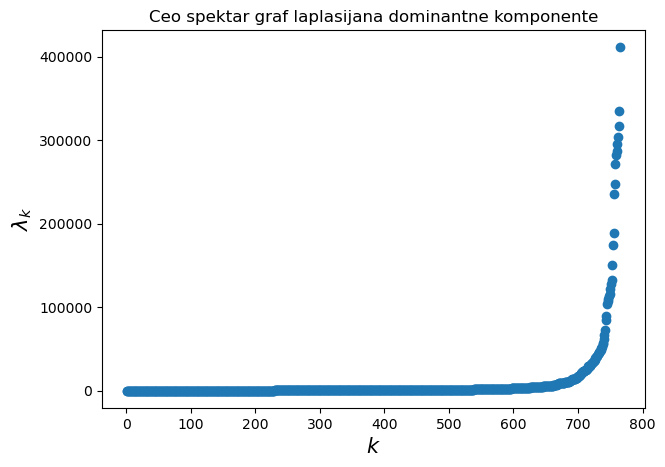

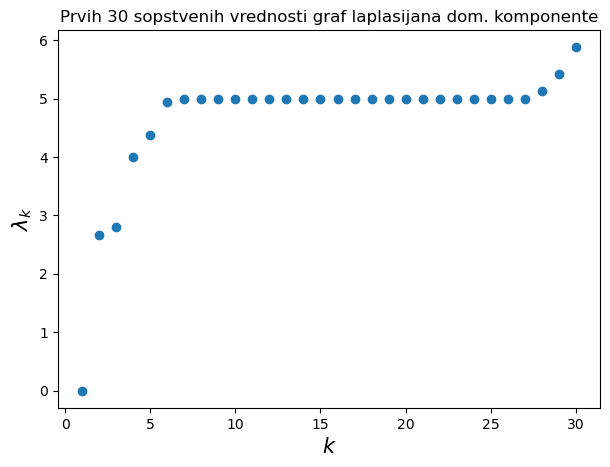

In [55]:
#//uzima se samo dominantna komponenta, ne ceo graf, ako ona pokriva preko posto cvorova, gleda se samo ona 
#ili ako ostale imaju mali broj cvorova, krnje
#//ako postoji vise gigantskih, racuna se za svaku posebno
#//to vazi i za centralnosti
#//gledaju su ovde gde su najveci skokovi, to je kod tacke 12, tako da bi podela na 12 bila verovatno najbolja

dominant_component = G2 #vec je dominantna

L_dom = nx.laplacian_matrix(dominant_component).toarray()

eigenvalues = linalg.eigvals(L_dom) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

#doc = Document() #//ne radi mi zbog importa nista ovo
#doc = docx.Document('tabela_eig.docx') #//bilo i njemu zakomentarisano
#t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
#t.cell(0,0).text = r'$k$'
#t.cell(0,1).text = r'$\lambda_k$'
#for i in range(df_eig30.shape[0]):
#    for j in range(df_eig30.shape[-1]):
#        t.cell(i+1,j).text = str(df_eig30.values[i,j])
#doc.save('etf/tabela_eig_dominantna_komponenta.docx')


plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana dominantne komponente')

df_eig_30 = df_eig[:30]
plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana dom. komponente')


C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


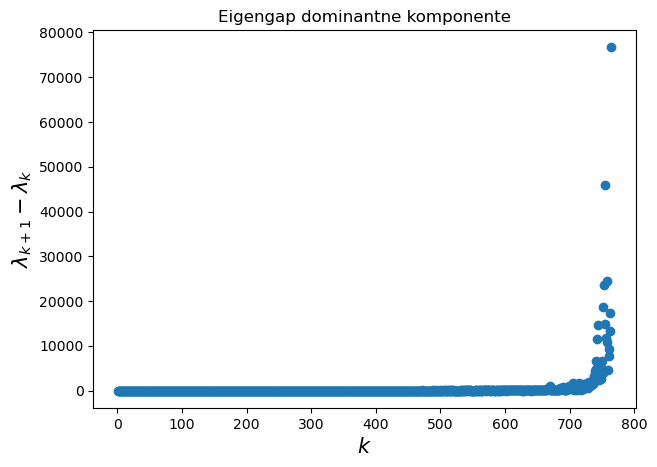

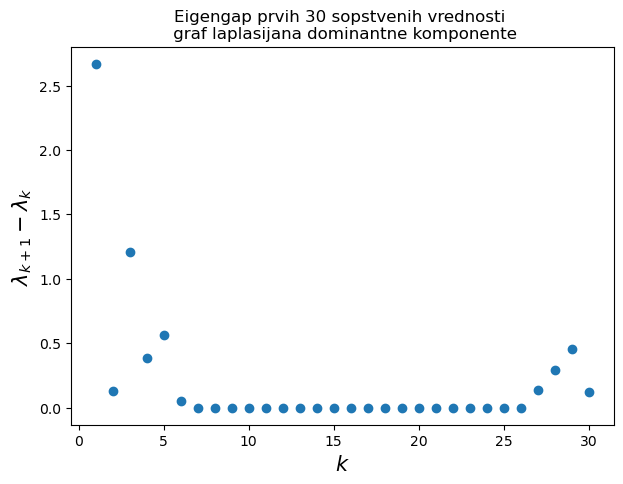

In [56]:
# eigengap

df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap dominantne komponente')

plot_scatterplot2(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti \n graf laplasijana dominantne komponente', 'Eigengap prvih 30 sopstvenih vrednosti graf laplasijana dominantne komponente')

In [57]:
#//deo koji radi klasterisanje!!

for k in range(2, 30):
    
    #//prima broj klastera (n_cluster), a fit matricu slicnosti, odn. ako su tezine u pitanju matricu susednosti iz networkx
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    nx.write_gml(G, "spectral.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")
    

Podela na 2: velicine komponenata su [762.   3.]
Podela na 3: velicine komponenata su [750.   3.  12.]
Podela na 4: velicine komponenata su [748.   2.   3.  12.]
Podela na 5: velicine komponenata su [741.   2.   7.   3.  12.]
Podela na 6: velicine komponenata su [738.   2.   3.   7.   3.  12.]
Podela na 7: velicine komponenata su [734.   3.   2.   7.   4.   3.  12.]
Podela na 8: velicine komponenata su [732.   2.   7.   3.   2.   3.   4.  12.]
Podela na 9: velicine komponenata su [728.   2.   2.   3.   7.   4.   3.  12.   4.]
Podela na 10: velicine komponenata su [726.   2.   3.   2.   7.   4.   3.   4.   4.  10.]
Podela na 11: velicine komponenata su [725.   2.   2.   3.   4.   7.   4.   3.   4.   9.   2.]
Podela na 12: velicine komponenata su [725.   9.   2.   3.   2.   3.   7.   4.   2.   4.   4.   0.]
Podela na 13: velicine komponenata su [721.   2.   2.   2.   3.   3.   7.   4.   3.   4.   4.   9.   1.]
Podela na 14: velicine komponenata su [719.   9.   3.   2.   3.   2.   3.   3.

Na osnovu spektralne analize procenjujemo da je dobar izbor za broj komuna 1, 3, 5, 28

Sprovesti klasterisanje Luvenskom metodom (maksimizacijom modularnosti) u alatu 
Gephi za tri različite vrednosti parametra rezolucije. Konstruisati vizuelizacije i 
diskutovati izbor parametra rezolucije na dobijeno klasterisanje (broj i veličina klastera).
Resolution: 0.1
Modularity: -0.021
Modularity with resolution: -0.030
Number of Communities: 66
Ima 66 klastera, od toga se veličinom ističe nekoliko klastera sa 20-85 čvorova u njima
    
    
Resolution: 1.0
Modularity: 0.094
Modularity with resolution: 0.094
Number of Communities: 5
Ima 5 klastera, od toga se veličinom ističu dva klastera sa oko 300 i 450 čvorova u njima 
    
Resolution: 2.0
Modularity: 0.000
Modularity with resolution: 1.000
Number of Communities: 4
Ima  4 klastera, od toga se veličinom ističe jedan klaster sa oko 750 čvorova u njemu


Čvorovi sa najvećim stepenom za dva najveća klastera za rezoluciju 1.0 putem Luvenske metode prikazana su na sledećim slikama:..

Ko su akteri koji se mogu okarakterisati kao ključni brokeri (mostovi) u mreži? Šta ih čini brokerima?

Čvorovi sa najvećom relacionom centralnošću: reddit.com     0.191220
politics       0.060963
pics           0.054266
technology     0.051593
science        0.051344
programming    0.049073
worldnews      0.048672
funny          0.047436
WTF            0.041516
entertainment  0.036209

I čvorovi koji su se pojavljuju u najvećem broju mostova iz funkcije networkx:

('reddit.com', 25),
 ('Chinese', 6),
 ('programming', 3),
 ('arabic', 3),
 ('Gamer', 2),
 ('ja', 2),
 ('Josie', 1),
 ('shoebush', 1),
 ('onlycode', 1),
 ('dotfiles', 1),
 ('management', 1),
 ('it', 1),
 ('businessnews', 1),
 ('Webometrics', 1),
 ('Infos', 1),
 ('fr', 1),
 ('SinoBeta', 1),
 ('sportscars', 1),
 ('ChileRemix', 1),
 ('KiNov', 1)

In [60]:
mostovi = list(nx.bridges(Gdom))
cvorovi_mosta = []

for grana in mostovi:
    cvorovi_mosta.append(grana[0])
    cvorovi_mosta.append(grana[1])
    
from collections import Counter
Counter(cvorovi_mosta).most_common()[0:20]

[('reddit.com', 25),
 ('Chinese', 6),
 ('programming', 3),
 ('arabic', 3),
 ('Gamer', 2),
 ('ja', 2),
 ('Josie', 1),
 ('shoebush', 1),
 ('onlycode', 1),
 ('dotfiles', 1),
 ('management', 1),
 ('it', 1),
 ('businessnews', 1),
 ('Webometrics', 1),
 ('Infos', 1),
 ('fr', 1),
 ('SinoBeta', 1),
 ('sportscars', 1),
 ('ChileRemix', 1),
 ('KiNov', 1)]

In [64]:
size=dfComments['author'].nunique()
print(size)
size2=dfSubmissions['author'].nunique()
print(size2)


88573
185355
